In [7]:
import sys
!{sys.executable} -m pip install -U pandas-profiling
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 268 kB 5.0 MB/s 
     |████████████████████████████████| 690 kB 53.3 MB/s 
     |████████████████████████████████| 4.7 MB 48.4 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 9.8 MB 42.3 MB/s 
     |████████████████████████████████| 102 kB 52.7 MB/s 
     |████████████████████████████████| 296 kB 45.5 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=0a70ec842f8165ffc84a15ffe05a6801908f2d69b897df9fd70bcce66b31527e
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
  Attempting uninstall: requests
   

In [8]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [25]:
import pandas as pd
from scipy.io import arff
import numpy as np
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [43]:
for i in range(0,len(df.Partner)):
    if df.Partner[i]=='Yes':
        df.Partner[i]='1'
    elif df.Partner[i]=='No':
        df.Partner[i]='0'

for i in range(0,len(df.Dependents)):
    if df.Dependents[i]=='Yes':
        df.Dependents[i]='1'
    elif df.Dependents[i]=='No':
        df.Dependents[i]='0'

for i in range(0,len(df.PhoneService)):
    if df.PhoneService[i]=='Yes':
        df.PhoneService[i]='1'
    elif df.PhoneService[i]=='No':
        df.PhoneService[i]='0'

for i in range(0,len(df.MultipleLines)):
    if df.MultipleLines[i]=='Yes':
        df.MultipleLines[i]='1'
    elif df.MultipleLines[i]=='No' or df.MultipleLines[i]=='No phone service':
        df.MultipleLines[i]='0'

for i in range(0,len(df.Churn)):
    if df.Churn[i]=='Yes':
        df.Churn[i]='1'
    elif df.Churn[i]=='No':
        df.Churn[i]='0'

for i in range(0,len(df.StreamingTV)):
    if df.StreamingTV[i]=='Yes':
        df.StreamingTV[i]='1'
    elif df.StreamingTV[i]=='No' or df.StreamingTV[i]=='No internet service':
        df.StreamingTV[i]='0'

for i in range(0,len(df.StreamingMovies)):
    if df.StreamingMovies[i]=='Yes':
        df.StreamingMovies[i]='1'
    elif df.StreamingMovies[i]=='No'or df.StreamingMovies[i]=='No internet service':
        df.StreamingMovies[i]='0'

for i in range(0,len(df.DeviceProtection)):
    if df.DeviceProtection[i]=='Yes':
        df.DeviceProtection[i]='1'
    elif df.DeviceProtection[i]=='No' or df.DeviceProtection[i]=='No internet service':
        df.DeviceProtection[i]='0'

for i in range(0,len(df.TechSupport)):
    if df.TechSupport[i]=='Yes':
        df.TechSupport[i]='1'
    elif df.TechSupport[i]=='No' or df.TechSupport[i]=='No internet service':
        df.TechSupport[i]='0'

for i in range(0,len(df.OnlineBackup)):
    if df.OnlineBackup[i]=='Yes':
        df.OnlineBackup[i]='1'
    elif df.OnlineBackup[i]=='No' or df.OnlineBackup[i]=='No internet service':
        df.OnlineBackup[i]='0'

for i in range(0,len(df.OnlineSecurity)):
    if df.OnlineSecurity[i]=='Yes':
        df.OnlineSecurity[i]='1'
    elif df.OnlineSecurity[i]=='No' or df.OnlineSecurity[i]=='No internet service':
        df.OnlineSecurity[i]='0'

for i in range(0,len(df.InternetService)):
    if df.InternetService[i]=='DSL':
        df.InternetService[i]='1'
    elif df.InternetService[i]=='Fiber optic':
        df.InternetService[i]='2'
    elif df.InternetService[i]=='No':
        df.InternetService[i]='0'

for i in range(0,len(df.Contract)):
    if df.Contract[i]=='One year':
        df.Contract[i]='1'
    elif df.Contract[i]=='Two year':
        df.Contract[i]='2'
    elif df.Contract[i]=='Month-to-month':
        df.Contract[i]='0'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [44]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,0,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,1,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,0,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,1,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,2,0,...,0,0,0,0,0,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,0,0,8,1,1,2,0,...,1,0,1,1,0,Yes,Electronic check,99.65,820.5,1
6,1452-KIOVK,Male,0,0,1,22,1,1,2,0,...,0,0,1,0,0,Yes,Credit card (automatic),89.10,1949.4,0
7,6713-OKOMC,Female,0,0,0,10,0,0,1,1,...,0,0,0,0,0,No,Mailed check,29.75,301.9,0
8,7892-POOKP,Female,0,1,0,28,1,1,2,0,...,1,1,1,1,0,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,0,1,62,1,0,1,1,...,0,0,0,0,1,No,Bank transfer (automatic),56.15,3487.95,0


(array([3875.,    0.,    0.,    0.,    0., 1473.,    0.,    0.,    0.,
        1695.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

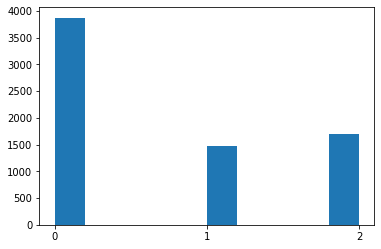

In [45]:
import matplotlib.pyplot as plt
plt.hist(df.Contract)

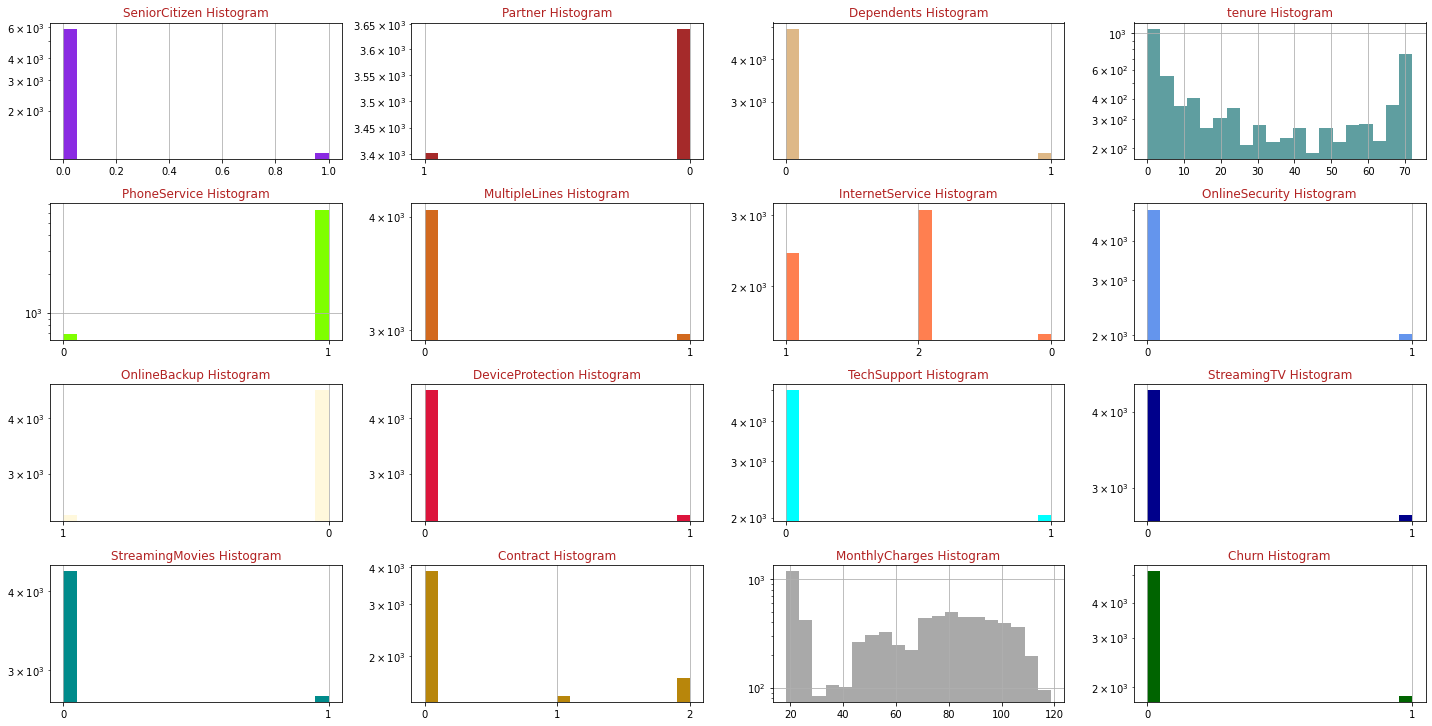

In [61]:
new_df=df.drop(columns=['customerID', 'gender','PaperlessBilling','PaymentMethod','TotalCharges'])
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(new_df,new_df.columns,8,4)

In [113]:
from sklearn.model_selection import train_test_split
class_col_name="Churn"
feature_names=new_df.columns[new_df.columns != class_col_name]
X_train, X_test, y_train, y_test = train_test_split(new_df.loc[:, feature_names], new_df[class_col_name], train_size=0.7,random_state=1)

In [114]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn.predict(X_test)

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [115]:
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
cm = confusion_matrix(y_test, pred)
print(cm)

[[1475  110]
 [ 348  180]]


Text(0.5, 257.44, 'Predicted label')

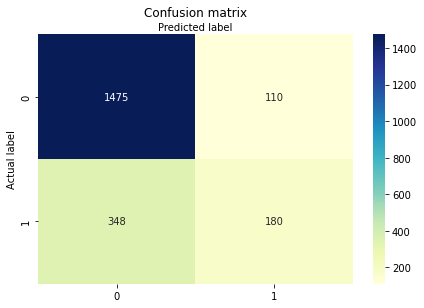

In [117]:
from sklearn import metrics
y_pred=pred
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [118]:
accuracy = float((cm[0][0] + cm[1][1]))/float(len(y_test))
print('The Accuracy is',accuracy)
sensitivity= float(cm[0][0]/(cm[0][0]+cm[1][0]))
print('The Sensitivity is',sensitivity)
specificity= float(cm[1][1]/(cm[1][1]+cm[0][1]))
print('The Specificity is',specificity)

The Accuracy is 0.7832465688594415
The Sensitivity is 0.8091058694459682
The Specificity is 0.6206896551724138


In [58]:
accuracy = float((cm[0][0] + cm[1][1]))/float(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print('The Accuracy is',accuracy)

The Accuracy is 0.7709417889256981


In [92]:
dfn = new_df.apply(pd.to_numeric)

In [93]:
correlation =dfn.corr(method='pearson')
correlation

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,Churn
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,0.259390,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.220173,0.150889
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,-0.000132,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,0.096848,-0.150448
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,-0.179631,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.113890,-0.164221
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.033230,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.247900,-0.352229
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.093720,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.247398,0.011942
MultipleLines,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.344684,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.490434,0.040102
InternetService,0.259390,-0.000132,-0.179631,0.033230,0.093720,0.344684,1.000000,0.156799,0.307420,0.313603,0.164833,0.429707,0.427264,-0.290189,0.905491,0.316846
OnlineSecurity,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,0.156799,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,0.296594,-0.171226
OnlineBackup,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.307420,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.441780,-0.082255
DeviceProtection,0.059428,0.153786,0.013963,0.360653,-0.071227,0.201137,0.313603,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.219310,0.482692,-0.066160


In [95]:
class_col_name="Churn"
feature_names=dfn.columns[dfn.columns != class_col_name]
X_train, X_test, y_train, y_test = train_test_split(dfn.loc[:, feature_names], dfn[class_col_name], train_size=0.7,random_state=1)

In [96]:
import statsmodels.discrete.discrete_model as sm
logit = sm.Logit(y_train , X_train)
logreg = logit.fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.432641
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4915
Method:                           MLE   Df Model:                           14
Date:                Tue, 27 Sep 2022   Pseudo R-squ.:                  0.2608
Time:                        01:51:47   Log-Likelihood:                -2132.9
converged:                       True   LL-Null:                       -2885.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
SeniorCitizen        0.2584      0.100      2.583      0.010       0.062       0.454
Partner              0.0067      0.091      0.073      0.942      -0.172       0.185
Dependents          -0.1748      0.104     -1.681      0.093      -0.379       0.029
tenure              -0.0370      0.003    -13.861      0.000      -0.042      -0.032
PhoneService        -0.0679      0.775     -0.088      0.930      -1.587       1.451
MultipleLines        0.7532      0.213      3.537      0.000       0.336       1.171
InternetService      2.0405      0.964      2.117      0.034       0.151       3.930
OnlineSecurity      -0.1898      0.215     -0.883      0.377      -0.611       0.231
OnlineBackup         0.1328      0.213      0.624      0.533      -0.284       0.550
DeviceProtection     0.1502      0.213      0.706      0.480      -0.267       0.567
TechSupport         -0.1794      0.215     -0.833      0.405      -0.601       0.243
StreamingTV          0.7887      0.394      2.004      0.045       0.017       1.560
StreamingMovies      0.8525      0.396      2.152      0.031       0.076       1.629
Contract            -0.7160      0.087     -8.216      0.000      -0.887      -0.545
MonthlyCharges      -0.0494      0.038     -1.284      0.199      -0.125       0.026
====================================================================================
"""

In [97]:
pred = logreg.predict(X_test)
pred = pred>0.5
actual = y_test>0.5
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actual, pred)
print(cm)

[[1374  211]
 [ 215  313]]


In [98]:
accuracy = float((cm[0][0] + cm[1][1]))/float(len(actual))
print('The Accuracy is',accuracy)
sensitivity= float(cm[0][0]/(cm[0][0]+cm[1][0]))
print('The Sensitivity is',sensitivity)
specificity= float(cm[1][1]/(cm[1][1]+cm[0][1]))
print('The Specificity is',specificity)

The Accuracy is 0.7983909133932797
The Sensitivity is 0.8646947765890497
The Specificity is 0.5973282442748091


In [100]:
dfn.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,1.222916,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,64.761692,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.778877,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.350000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,118.750000,1.000000


Text(0.5, 257.44, 'Predicted label')

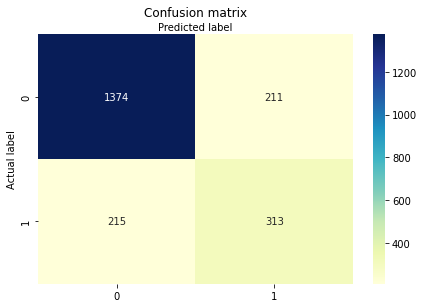

In [112]:
from sklearn import metrics
y_pred=logreg.predict(X_test)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')